## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





**GIT LINK:**
https://github.com/GAUTHAMJAYADEEP/CPSC_Assignment3/tree/main

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

housing_df = pd.read_csv('train.csv')
housing_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 **Analysis on the distribution of SalePrice**

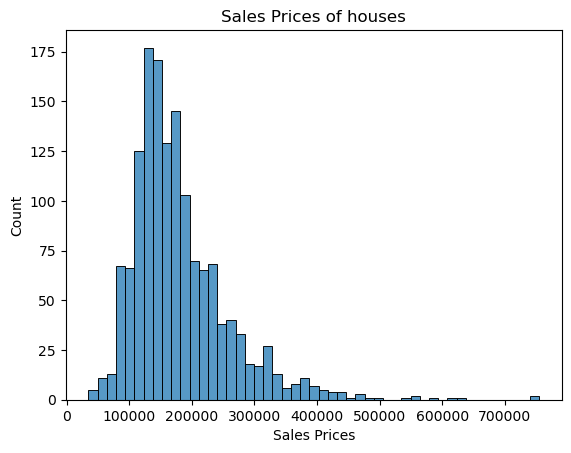

In [3]:
sns.histplot(housing_df['SalePrice'])
plt.title("Sales Prices of houses")
plt.xlabel('Sales Prices')
plt.show()

In [4]:
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Determine if the year of built affects the sale price of the house**

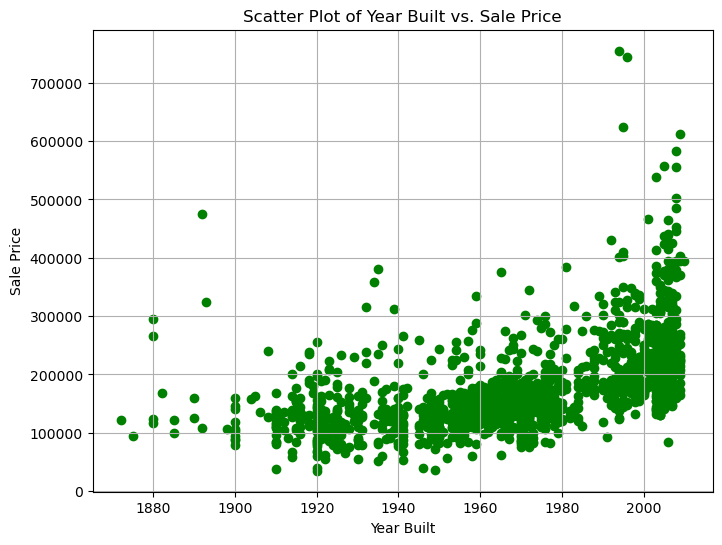

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(housing_df['YearBuilt'], housing_df['SalePrice'], c='green')
plt.title('Scatter Plot of Year Built vs. Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)

In [31]:
bins_year = [1850, 1950, 2000, 2022] 
bins_price = [0, 100000, 200000, 300000, 500000, 1000000]
housing_df['YearBuiltCategory'] = pd.cut(housing_df['YearBuilt'], bins=bins_year, labels=['1850-1950', '1950-2000', '2000-2022'])
housing_df['SalePriceCategory'] = pd.cut(housing_df['SalePrice'], bins=bins_price)
frequency_table = pd.crosstab(housing_df['YearBuiltCategory'], housing_df['SalePriceCategory'])

In [32]:
chi2, p, dof, _ = chi2_contingency(frequency_table)

print(f"Chi-squared value: {chi2}")
print(f"Degree of freedom: {dof}")
print(f"P-value: {p}")

Chi-squared value: 411.88818868825433
Degree of freedom: 8
P-value: 5.358640559461605e-84


**Determine Living area is associated with Sale Price**

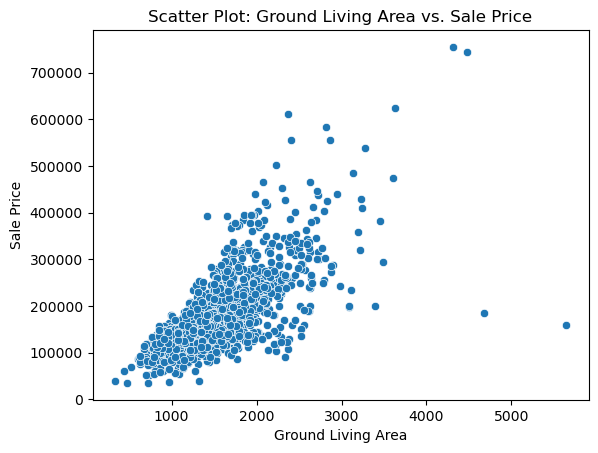

In [34]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing_df)
plt.title("Scatter Plot: Ground Living Area vs. Sale Price")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

In [41]:
correlation = housing_df['GrLivArea'].corr(housing_df['SalePrice'])
print(f'Correlation between Ground Living Area and Sale Price: {correlation:.2f}')

Correlation between Ground Living Area and Sale Price: 0.71


**Determine if overall quality of house is associated with the Sale Price**

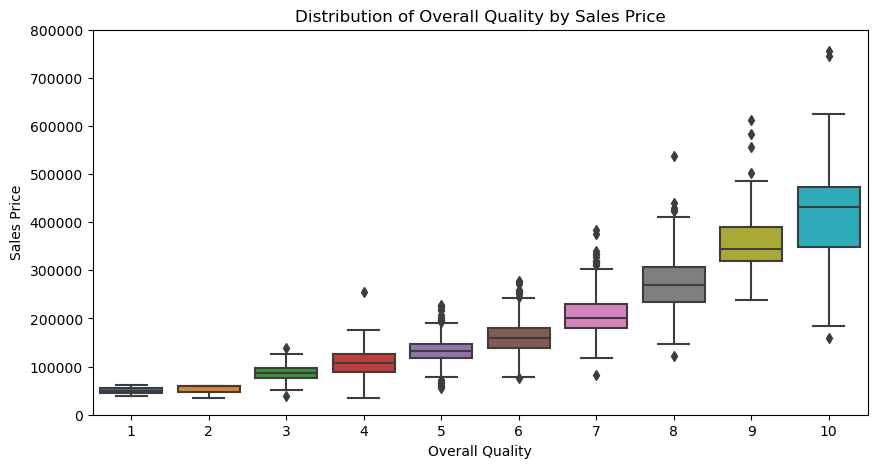

In [42]:
quali_sale = pd.concat([housing_df['SalePrice'], housing_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=quali_sale)
fig.axis(ymin=0, ymax=800000)
plt.title("Distribution of Overall Quality by Sales Price")
plt.xlabel('Overall Quality')
plt.ylabel('Sales Price')
plt.show()

**Analyze the distribution of sale condition of the houses.**

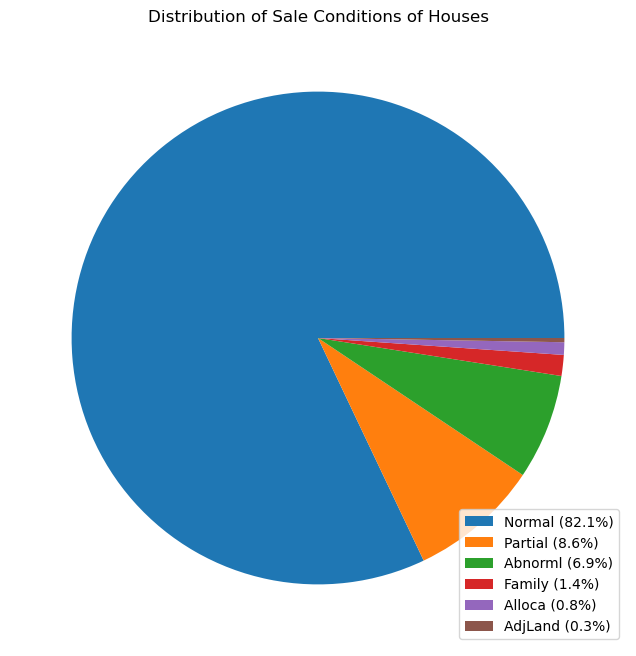

In [63]:
# Assuming 'SaleCondition' is the column representing the sale condition
sale_condition_counts = housing_df['SaleCondition'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
sale_cond_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in
                    zip(sale_cond_rel_freq.index.values, sale_cond_rel_freq)]
plt.pie(sale_condition_counts,labels=None)
# Add a legend with values
plt.legend(loc='lower right', labels=sale_cond_labels)

# Set the title
plt.title('Distribution of Sale Conditions of Houses')

# Display the pie chart
plt.show()
